In [ ]:
from k2400ser import *
brad = K2400ser('/dev/ttyUSB0')#, ilimit=1,vlimit=1,function=':SOURCE:FUNCTION VOLTAGE')

In [ ]:
import serial, string, time, csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# keith=serial.Serial('/dev/ttyUSB0', baudrate = 57600)

In [ ]:
def read(self):
    temp_read=str(self.read(self.in_waiting))
    pos_b=temp_read.find("b'")+2
    pos_r=temp_read.find("\\r'")
    
    return temp_read[pos_b:pos_r]
    

In [ ]:
def write(self, command):
        self.write(('{0!s}\r'.format(command)).encode())

In [ ]:
write(keith,"SOURCE:FUNCTION voltage")

In [ ]:
write(keith,':SENSE:CURRENT:PROTECTION 1.0E-0')

In [ ]:
write(keith,':SENSE:CURRENT:PROTECTION:LEVEL?')

In [ ]:
read(keith)

In [ ]:
keith.in_waiting

In [ ]:
keith.in_waiting

In [ ]:
keith.read(keith.in_waiting)

In [ ]:
write(keith,':SOURCE:VOLTAGE {0!s}'.format(.1))
write(keith,':MEASURE:CURRENT?')
# write(keith,':MEASURE:RAD?')


In [ ]:
write(keith,':OUTPUT ON')

In [ ]:
write(keith,':MEASURE:READ')

In [ ]:
write(keith,':OUTPUT OFF')

In [ ]:
write(keith,':SOUR:VOLT:RANG .15')

In [ ]:
write(keith,':READ?')

In [ ]:
# write(keith,'*RST')
write(keith,':SOUR:FUNC VOLT')
write(keith,':SOUR:VOLT:MODE FIXED')
write(keith,':SOUR:VOLT:RANG 3')
write(keith,':SOUR:VOLT:LEV '+str(1.5))
write(keith,':SENS:CURR:PROT 10E-3')
write(keith,':SENS:FUNC "CURR"')
write(keith,':SENS:CURR:RANG 10E-3')
write(keith,':FORM:ELEM CURR')
write(keith,':OUTPUT ON')
write(keith,':READ?')
write(keith,':OUTPUT OFF')

In [ ]:
read(keith)

In [ ]:
write(keith,':SOUR:VOLT:LEV '+str(0.1211))

In [ ]:
write(keith,':OUTPUT ON')

In [ ]:
write(keith,':READ?')

In [ ]:
write(keith,':MEASURE:CURRENT?')

In [ ]:
Vin=np.linspace(-2,2,100)
Iout=[]
write(keith,':SOUR:FUNC VOLT')
write(keith,':SOUR:VOLT:MODE FIXED')
write(keith,':SOUR:VOLT:RANG .5')
write(keith,':SENS:CURR:PROT 10E-1')
write(keith,':SENS:FUNC "CURR"')
write(keith,':SENS:CURR:RANG 10E-1')
write(keith,':FORM:ELEM CURR')
write(keith,':OUTPut ON')
read(keith)
for v in Vin:
#     print(str(v))
    
    write(keith,':SOUR:VOLT:LEV '+str(v))
#     time.sleep(1)
    write(keith,':READ?')
    time.sleep(.5)
    Iout.append(read(keith))
#     time.sleep(.5)
    
write(keith,':OUTPUT OFF')

In [ ]:
Iout=[float(i) for i in Iout]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('J-V Curve')
ax.plot(Vin,Iout)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')

In [ ]:
Vin[1]/float(Iout[1])

In [ ]:
Vin[0]/float(Iout[0])

In [ ]:
n=5
Vin[n]/float(Iout[n])

In [ ]:

V=list(Vin)
V.insert(0,'V')
V
with open('test.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    V=list(Vin)
    V.insert(0,'V')
    I=list(Iout)
    I.insert(0,'I')
    spamwriter.writerow(V)
    spamwriter.writerow(I)



In [ ]:
a=[(Vin[i], Iout[i]) for i in range(len(Iout))]

In [ ]:
temp=list(Vin).insert(0,'V')
temp
a=None

In [ ]:
a=list(Vin)

In [ ]:
a.insert(0,'V')

In [ ]:
a

In [ ]:
c.extend([1, 2])

In [ ]:
d=['Vin']

In [ ]:
d.extend([1, 2])

In [ ]:
d

In [ ]:
Iout.insert(0,'I')

In [ ]:
Iout

In [ ]:
Iout=Iout[1:0]

In [ ]:
a = list(np.linspace(1,10,10))

In [ ]:
a

In [ ]:
a[1:]

In [ ]:
10e-2

In [ ]:
temp

In [ ]:
temp=[]
with open('jv_device1p2.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    print(spamreader)
    for row in spamreader:
         temp.append(row)

In [ ]:
v_series=[float(i) for i in temp[0][1:]]

In [ ]:
i_series=[float(i) for i in temp[1][0:]]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('J-V Curve')
ax.plot(v_series,i_series)
# ax.plot(v_series,i_fit)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')

In [ ]:
_,Isc = np.polyfit(v_series,i_series,1)

In [ ]:
Isc

In [ ]:
i_fit=np.multiply(v_series,m)+b

In [ ]:
_,Voc = np.polyfit(i_series,v_series,1)

In [ ]:
Voc

In [ ]:
product=np.multiply(v_series,i_series)
fourthQ=[]
for p in list(product):
    if p<0:
        fourthQ.append(p)

In [ ]:
abs(min(fourthQ))/abs(Isc*Voc)

In [1]:
from jvtool import *
%matplotlib notebook

Jsc -2.27541963410891 mA*cm^-2
Voc 0.02194935259663168 V
Fill Factor 0.2521393684516816


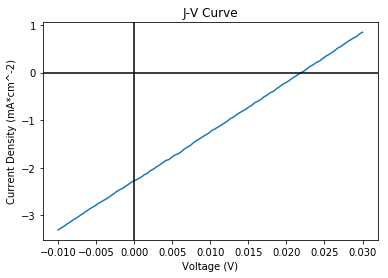

In [2]:
d1p1=analyzer('jv_device1p1.csv',.5)
d1p1.plotJV()

Jsc -14.275423821794849 mA*cm^-2
Voc 0.08065639328112659 V
Fill Factor 0.2502616211633375


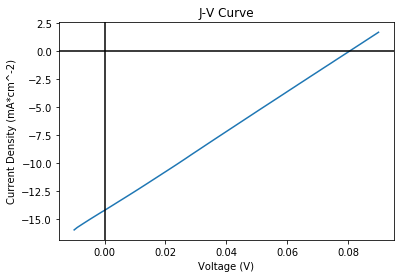

In [3]:
d1p2=analyzer('jv_device1p2.csv',.5)
d1p2.plotJV()

Jsc -2.573094984466195 mA*cm^-2
Voc 0.019679372418190604 V
Fill Factor 0.24923656135444613


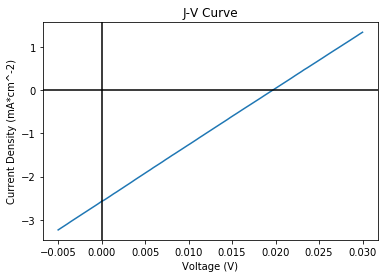

In [5]:
d1p3=analyzer('jv_device1p3.csv',.5)
d1p3.plotJV()

Jsc -28.139978469166017 mA*cm^-2
Voc 0.29863730576645825 V
Fill Factor 0.2563464758572045


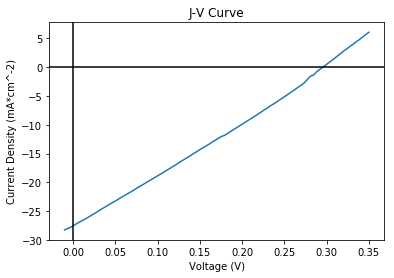

In [7]:
d2p1=analyzer('jv_device2p2on10min.csv',.5)
d2p1.plotJV()

Jsc -12.509732775641131 mA*cm^-2
Voc 0.13562436700507913 V
Fill Factor 0.24005691165138393


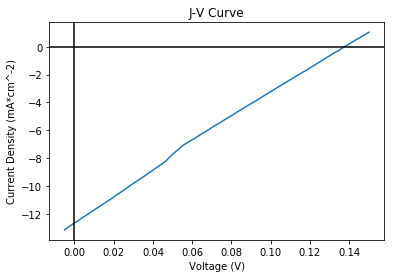

In [7]:
d2p2=analyzer('jv_device2p2.csv',.5)
d2p2.plotJV()

In [56]:
keith=k2401('/dev/ttyUSB0')

In [78]:
v_series=np.linspace(-0.01,.03,100)

In [79]:
keith.simple_jv(v_series,'.05','10E-3','10E-3',delay=0.5)

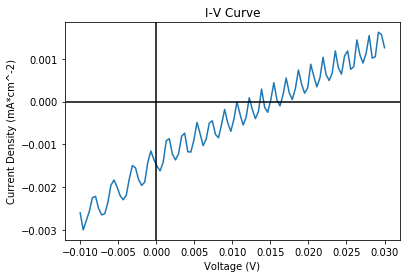

In [80]:
keith.plotIV()

In [61]:
keith.save_csv('device3p1.csv')